#**FM GROUP 14. COMPANY ASSIGNED: APOLLO HOSPITALS**

In [1]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

#1.) **TOP DOWN APPROACH**

Finding beta levered by using linear regression model, followed by CAPM model for cost of equity.

In [2]:
#Download stock prices for the security monthly data last 5 years
apollo_df = yf.download('APOLLOHOSP.NS',
                      start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo'
)
apollo_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS
Date,,,,,,
2019-05-01 00:00:00+00:00,1216.398560,1238.800049,1266.900024,1112.150024,1216.500000,9342119
2019-06-01 00:00:00+00:00,1334.621216,1359.199951,1406.000000,1243.000000,1243.000000,18940925
2019-07-01 00:00:00+00:00,1327.158569,1351.599976,1427.000000,1290.550049,1363.000000,12637012
2019-08-01 00:00:00+00:00,1480.877808,1508.150024,1542.449951,1275.000000,1344.000000,18770789
2019-09-01 00:00:00+00:00,1370.264771,1395.500000,1579.699951,1360.199951,1508.150024,13524153


In [3]:
#Download Market index closing prices
nifty_df = yf.download('^BSESN',start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo',
)
nifty_df.head()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,,
2019-05-01 00:00:00+00:00,39714.199219,39714.199219,40124.960938,36956.101562,39036.511719,396100
2019-06-01 00:00:00+00:00,39394.640625,39394.640625,40312.070312,38870.960938,39806.859375,311500
2019-07-01 00:00:00+00:00,37481.121094,37481.121094,40032.410156,37128.261719,39543.730469,445000
2019-08-01 00:00:00+00:00,37332.789062,37332.789062,37807.550781,36102.351562,37387.179688,558800
2019-09-01 00:00:00+00:00,38667.328125,38667.328125,39441.121094,35987.800781,37181.761719,565500


In [4]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2019-05-01 00:00:00+00:00         NaN
2019-06-01 00:00:00+00:00   -0.008079
2019-07-01 00:00:00+00:00   -0.049792
2019-08-01 00:00:00+00:00   -0.003965
2019-09-01 00:00:00+00:00    0.035123
2019-10-01 00:00:00+00:00    0.037106
2019-11-01 00:00:00+00:00    0.016430
2019-12-01 00:00:00+00:00    0.011211
2020-01-01 00:00:00+00:00   -0.012937
2020-02-01 00:00:00+00:00   -0.061426
2020-03-01 00:00:00+00:00   -0.262058
2020-04-01 00:00:00+00:00    0.134699
2020-05-01 00:00:00+00:00   -0.039119
2020-06-01 00:00:00+00:00    0.074038
2020-07-01 00:00:00+00:00    0.074248
2020-08-01 00:00:00+00:00    0.026798
2020-09-01 00:00:00+00:00   -0.014613
2020-10-01 00:00:00+00:00    0.039812
2020-11-01 00:00:00+00:00    0.108402
2020-12-01 00:00:00+00:00    0.078420
2021-01-01 00:00:00+00:00   -0.031172
2021-02-01 00:00:00+00:00    0.059024
2021-03-01 00:00:00+00:00    0.008299
2021-04-01 00:00:00+00:00   -0.014789
2021-05-01 00:00:00+00:00    0.062671
2021-06-01 00:00:00+00:00    0.010444
2021-07

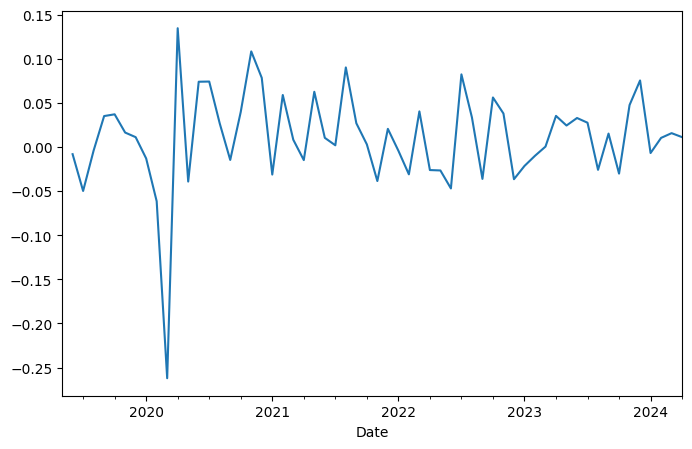

In [5]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

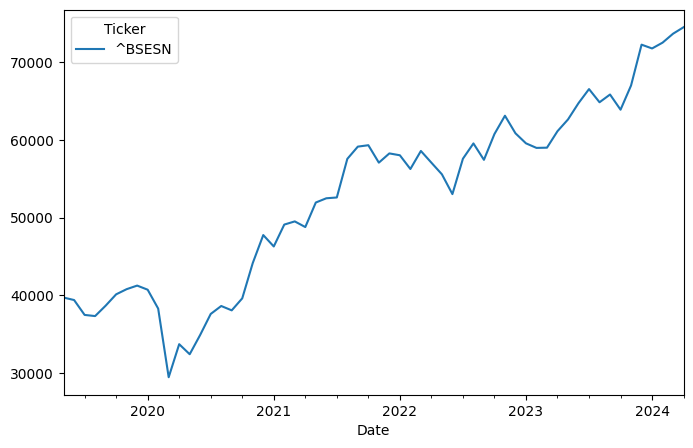

In [6]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [7]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

Price,Adj Close,Close,High,Low,Open,Volume,Return_NIFTY
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN,
Date,,,,,,,
2019-06-01 00:00:00+00:00,39394.640625,39394.640625,40312.070312,38870.960938,39806.859375,311500,-0.008079
2019-07-01 00:00:00+00:00,37481.121094,37481.121094,40032.410156,37128.261719,39543.730469,445000,-0.049792
2019-08-01 00:00:00+00:00,37332.789062,37332.789062,37807.550781,36102.351562,37387.179688,558800,-0.003965
2019-09-01 00:00:00+00:00,38667.328125,38667.328125,39441.121094,35987.800781,37181.761719,565500,0.035123
2019-10-01 00:00:00+00:00,40129.050781,40129.050781,40392.218750,37415.828125,38813.480469,859000,0.037106


In [8]:
#Caclulate log returns
apollo_df['Return_APOLLO'] = np.log(apollo_df['Adj Close']/apollo_df['Adj Close'].shift(1))
print(apollo_df['Return_APOLLO'])

Date
2019-05-01 00:00:00+00:00         NaN
2019-06-01 00:00:00+00:00    0.092753
2019-07-01 00:00:00+00:00   -0.005607
2019-08-01 00:00:00+00:00    0.109595
2019-09-01 00:00:00+00:00   -0.077631
2019-10-01 00:00:00+00:00    0.066043
2019-11-01 00:00:00+00:00   -0.029804
2019-12-01 00:00:00+00:00    0.000555
2020-01-01 00:00:00+00:00    0.140907
2020-02-01 00:00:00+00:00    0.044530
2020-03-01 00:00:00+00:00   -0.419464
2020-04-01 00:00:00+00:00    0.202234
2020-05-01 00:00:00+00:00   -0.027189
2020-06-01 00:00:00+00:00   -0.005246
2020-07-01 00:00:00+00:00    0.215581
2020-08-01 00:00:00+00:00   -0.024207
2020-09-01 00:00:00+00:00    0.273193
2020-10-01 00:00:00+00:00   -0.011774
2020-11-01 00:00:00+00:00    0.102365
2020-12-01 00:00:00+00:00    0.027266
2021-01-01 00:00:00+00:00    0.059708
2021-02-01 00:00:00+00:00    0.177478
2021-03-01 00:00:00+00:00   -0.052350
2021-04-01 00:00:00+00:00    0.096745
2021-05-01 00:00:00+00:00   -0.009032
2021-06-01 00:00:00+00:00    0.133095
2021-07

In [9]:
apollo_df1 = apollo_df.dropna(axis=0)
apollo_df1.head()

Price,Adj Close,Close,High,Low,Open,Volume,Return_APOLLO
Ticker,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS,APOLLOHOSP.NS,
Date,,,,,,,
2019-06-01 00:00:00+00:00,1334.621216,1359.199951,1406.000000,1243.000000,1243.000000,18940925,0.092753
2019-07-01 00:00:00+00:00,1327.158569,1351.599976,1427.000000,1290.550049,1363.000000,12637012,-0.005607
2019-08-01 00:00:00+00:00,1480.877808,1508.150024,1542.449951,1275.000000,1344.000000,18770789,0.109595
2019-09-01 00:00:00+00:00,1370.264771,1395.500000,1579.699951,1360.199951,1508.150024,13524153,-0.077631
2019-10-01 00:00:00+00:00,1463.816284,1484.800049,1543.300049,1348.550049,1398.000000,11477351,0.066043


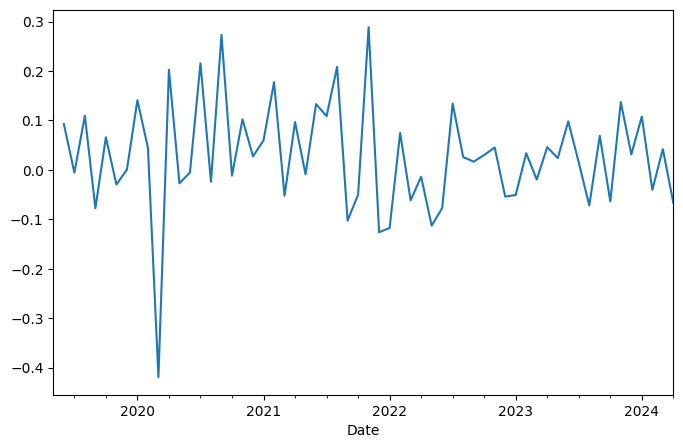

In [10]:
apollo_df['Return_APOLLO'].plot(figsize=(8,5))
plt.show()

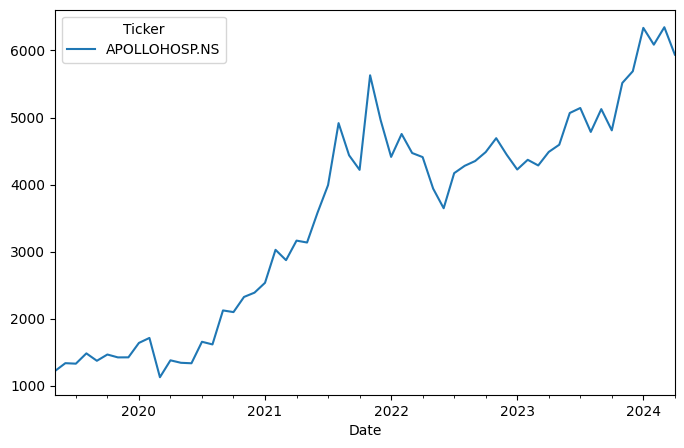

In [11]:
apollo_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [12]:
apollo_df1_returns = apollo_df1['Return_APOLLO']
apollo_df1_returns.head()


,Return_APOLLO
Date,
2019-06-01 00:00:00+00:00,0.092753
2019-07-01 00:00:00+00:00,-0.005607
2019-08-01 00:00:00+00:00,0.109595
2019-09-01 00:00:00+00:00,-0.077631
2019-10-01 00:00:00+00:00,0.066043


In [13]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

,Return_NIFTY
Date,
2019-06-01 00:00:00+00:00,-0.008079
2019-07-01 00:00:00+00:00,-0.049792
2019-08-01 00:00:00+00:00,-0.003965
2019-09-01 00:00:00+00:00,0.035123
2019-10-01 00:00:00+00:00,0.037106


In [14]:
returns = pd.merge(nifty_df1_returns,apollo_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_APOLLO
count,59.000000,59.000000
mean,0.010659,0.026872
std,0.055401,0.112261
min,-0.262058,-0.419464
25%,-0.018117,-0.045299
50%,0.011211,0.025918
75%,0.037555,0.097408
max,0.134699,0.288565


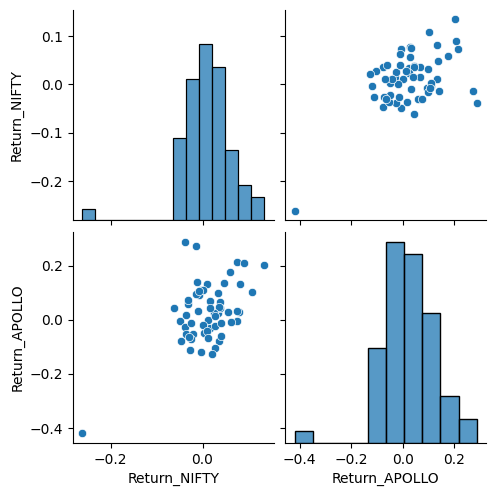

In [15]:
sns.pairplot(returns)
plt.show()

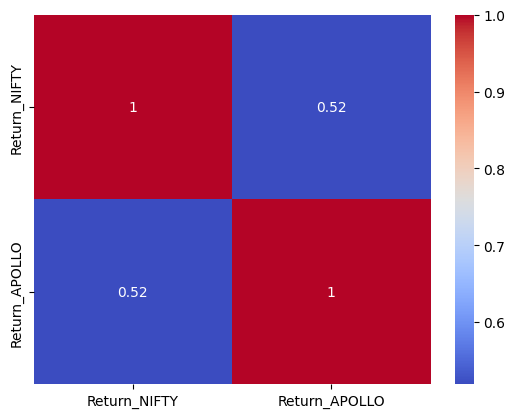

In [16]:
sns.heatmap(returns.corr(), annot = True, cmap="coolwarm")
plt.show()

In [17]:
x = returns['Return_NIFTY']
y = returns['Return_APOLLO']
x_sm = sm.add_constant(x)

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [18]:
#Regression - Market model
model = sm.OLS(y,x_sm)

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [19]:
results = model.fit()

In [20]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Return_APOLLO   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     21.01
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           2.54e-05
Time:                        06:54:54   Log-Likelihood:                 55.074
No. Observations:                  59   AIC:                            -106.1
Df Residuals:                      57   BIC:                            -102.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0157      0.013      1.220      0.227      -0.010       0.041
Return_NIFTY     1.0516      0.229      4.584      0.000       0.592       1.511
==============================================================================
Omnibus:                        9.717   Durbin-Watson:                   2.691
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.499
Skew:                           0.810   Prob(JB):                      0.00866
Kurtosis:                       4.113   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Beta for Apollo Hospitals stock = 1.0516 and significant at 5% Level


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-06-01 00:00:00+00:00 to 2024-04-01 00:00:00+00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Return_NIFTY   59 non-null     float64
 1   Return_APOLLO  59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_APOLLO'>

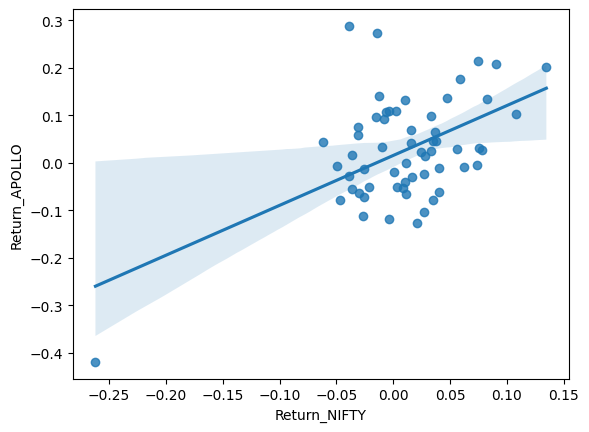

In [21]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_APOLLO', data = returns)

In [22]:
print('resid', results.resid)

resid Date
2019-06-01 00:00:00+00:00    0.085586
2019-07-01 00:00:00+00:00    0.031093
2019-08-01 00:00:00+00:00    0.098101
2019-09-01 00:00:00+00:00   -0.130231
2019-10-01 00:00:00+00:00    0.011358
2019-11-01 00:00:00+00:00   -0.062746
2019-12-01 00:00:00+00:00   -0.026899
2020-01-01 00:00:00+00:00    0.138848
2020-02-01 00:00:00+00:00    0.093465
2020-03-01 00:00:00+00:00   -0.159538
2020-04-01 00:00:00+00:00    0.044916
2020-05-01 00:00:00+00:00   -0.001714
2020-06-01 00:00:00+00:00   -0.098770
2020-07-01 00:00:00+00:00    0.121836
2020-08-01 00:00:00+00:00   -0.068051
2020-09-01 00:00:00+00:00    0.272897
2020-10-01 00:00:00+00:00   -0.069306
2020-11-01 00:00:00+00:00   -0.027298
2020-12-01 00:00:00+00:00   -0.070867
2021-01-01 00:00:00+00:00    0.076826
2021-02-01 00:00:00+00:00    0.099743
2021-03-01 00:00:00+00:00   -0.076740
2021-04-01 00:00:00+00:00    0.096634
2021-05-01 00:00:00+00:00   -0.090603
2021-06-01 00:00:00+00:00    0.106449
2021-07-01 00:00:00+00:00    0.090826
2

,0
count,5.900000e+01
mean,-5.174768e-18
std,9.595817e-02
min,-1.635496e-01
25%,-6.749608e-02
50%,-1.762906e-02
75%,7.417840e-02
max,3.134285e-01


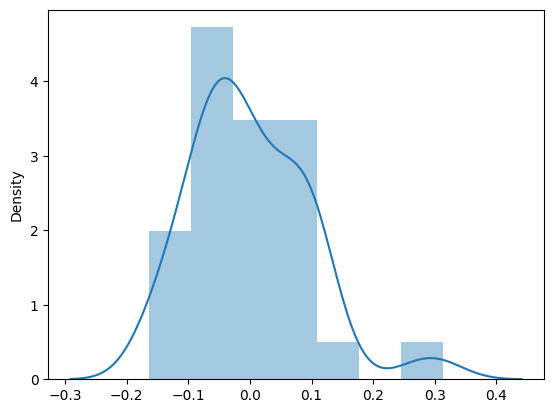

In [23]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [24]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 2.694306276292906, 'Test Statistic p-value': 0.25997933337464846, 'F-Statistic': 1.3398392018112664, 'F-Test p-value': 0.27015216723494384}


#The errors are homoskedastic as per the White test


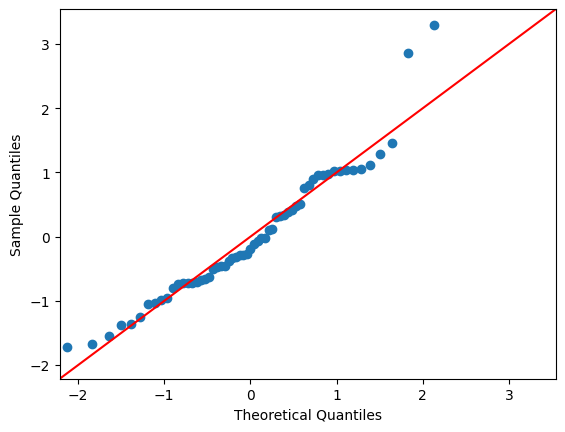

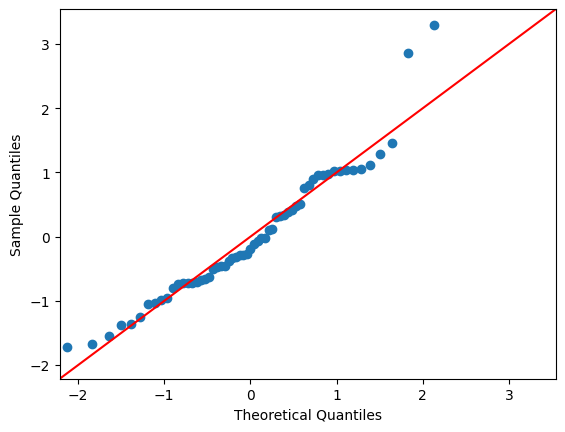

In [25]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [26]:
stats.normaltest(results.resid)

NormaltestResult(statistic=9.717044894293053, pvalue=0.007761944105176862)

In [27]:
risk_premium =  4.06
rf = 6.92 #risk-free rate
beta_APOLLO = 1.0516
rce = rf + (beta_APOLLO)*risk_premium
print(f"The value of cost of equity capital is {rce}%")

The value of cost of equity capital is 11.189496%


We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line.
The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.

**2.) BOTTOM-UP APPROACH**

Finding unlevered beta for 5 comparable companies, taking their average to use as unlevered beta for APOLLO and relevering beta again

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

def beta(ticker):

  #collecting historical data
  company_data = yf.download(ticker, start='2019-04-06', end='2024-04-06', progress=False)

  #collecting bse sensex as market index data
  market_index_data = yf.download('^BSESN', start='2019-04-06', end='2024-04-06', progress=False)  # BSE Sensex as market index

  #calculating monthly returns for both
  company_returns = np.log(company_data['Adj Close'] / company_data['Adj Close'].shift(1)).dropna()
  market_returns = np.log(market_index_data['Adj Close'] / market_index_data['Adj Close'].shift(1)).dropna()

  # Align the indices of company_returns and market_returns using the intersection
  # of their indices before dropping any NaN values.
  common_index = company_returns.index.intersection(market_returns.index)
  company_returns = company_returns.loc[common_index]
  market_returns = market_returns.loc[common_index]

  #regression model
  X = sm.add_constant(market_returns)
  model = sm.OLS(company_returns, X).fit()
  beta = model.params[1]

  print("Beta levered: ", beta)
  print("\n")


  return beta

#CHOSEN RELEVANT 5 COMPANIES:
#Fortis Healthcare Ltd. (FORTIS.NS)
#Narayana Hrudayalaya Ltd. (NH.NS)
#Max Healthcare Institute Ltd. (MAXHEALTH.NS)
#Aster DM Healthcare Ltd. (ASTERDM.NS)
#Healthcare Global Enterprises Ltd. (HCG.NS)

print("Fortis Healthcare Ltd. : ")
beta_FORTIS= beta('FORTIS.NS')

print("Narayan Hrudayalaya Ltd. : ")
beta_NH = beta('NH.NS')

print("Max Healthcare Institute Ltd. : ")
beta_MAXHEALTH = beta('MAXHEALTH.NS')

print("Aster DM Healthcare Ltd. : ")
beta_ASTERDM = beta('ASTERDM.NS')

print("Healthcare Global Enterprises Ltd. : ")
beta_HCG = beta('HCG.NS')

Fortis Healthcare Ltd. : 
Beta levered:  0.5602534363672836


Narayan Hrudayalaya Ltd. : 
Beta levered:  0.4136839922857255


Max Healthcare Institute Ltd. : 
Beta levered:  0.46858213498293066


Aster DM Healthcare Ltd. : 
Beta levered:  0.5853437202887803


Healthcare Global Enterprises Ltd. : 
Beta levered:  0.4262995126877559




In [29]:
import yfinance as yf

def calculate_de_ratio(ticker_symbol):

    # Get balance sheet data
    ticker = yf.Ticker(ticker_symbol)
    balance_sheet = ticker.balance_sheet


    try:
        # Get the most recent total debt and equity values
        total_debt = balance_sheet.loc['Total Debt'].iloc[0]
        total_equity = balance_sheet.loc['Stockholders Equity'].iloc[0]

        # Calculate D/E ratio
        debt_to_equity_ratio = total_debt / total_equity
        print(f"Total Debt to Total Equity Ratio for {ticker_symbol}: {debt_to_equity_ratio:.2f}")
        return debt_to_equity_ratio

    except (KeyError, IndexError):
        print("Required financial data is not available.")
        return None

In [30]:
#calculating unlevered beta for comparable companies
#found corresponding tax rates using income_statement
def calculate_unlevered_beta(beta,ticker_symbol):
    if ticker_symbol == 'FORTIS.NS':
      T = 0.2479
    elif ticker_symbol == 'NH.NS':
      T = 0.1113
    elif ticker_symbol == 'MAXHEALTH.NS':
      T = 0.2253
    elif ticker_symbol == 'ASTERDM.NS':
      T = 0.21631
    elif ticker_symbol == 'HCG.NS':
      T = 0.3989
    else:
      T = 0.245
    de_ratio = calculate_de_ratio(ticker_symbol)
    unlevered_beta = beta /(1+(1-T)*de_ratio)
    print(f"Unlevered Beta for {ticker_symbol} : {unlevered_beta:.2f}")
    print("\n")
    return unlevered_beta


In [31]:
unlev_beta_FORTIS = calculate_unlevered_beta(beta_FORTIS,'FORTIS.NS')
unlev_beta_NH = calculate_unlevered_beta(beta_NH,'NH.NS')
unlev_beta_MAXHEALTH = calculate_unlevered_beta(beta_MAXHEALTH,'MAXHEALTH.NS')
unlev_beta_ASTERDM = calculate_unlevered_beta(beta_ASTERDM,'ASTERDM.NS')
unlev_beta_HCG = calculate_unlevered_beta(beta_HCG,'HCG.NS')

Total Debt to Total Equity Ratio for FORTIS.NS: 0.15
Unlevered Beta for FORTIS.NS : 0.50


Total Debt to Total Equity Ratio for NH.NS: 0.56
Unlevered Beta for NH.NS : 0.28


Total Debt to Total Equity Ratio for MAXHEALTH.NS: 0.18
Unlevered Beta for MAXHEALTH.NS : 0.41


Total Debt to Total Equity Ratio for ASTERDM.NS: 0.30
Unlevered Beta for ASTERDM.NS : 0.47


Total Debt to Total Equity Ratio for HCG.NS: 1.54
Unlevered Beta for HCG.NS : 0.22




In [32]:
#average of unlevered beta values
averages = [unlev_beta_FORTIS,unlev_beta_NH,unlev_beta_MAXHEALTH,unlev_beta_ASTERDM,unlev_beta_HCG]
unlev_beta_APOLLO = np.mean(averages)
print(f"Average Unlevered Beta : {np.mean(averages)}")

#calculating leverd beta of target company APOLLO using avg from above
levered_beta_APOLLO = unlev_beta_APOLLO *(1+(1-0.2945)*calculate_de_ratio('APOLLO.NS'))
print(f"Relevered Beta for APOLLO : {levered_beta_APOLLO}")

#Cost of equity using formula Re=Rf+Beta levered*mrp
cost_of_equity_APOLLO = rf+ (levered_beta_APOLLO)*risk_premium
print(f"Cost of equity capital using industry beta is {cost_of_equity_APOLLO} %")

Average Unlevered Beta : 0.376842159133701
Total Debt to Total Equity Ratio for APOLLO.NS: 0.40
Relevered Beta for APOLLO : 0.4835132989392302
Cost of equity capital using industry beta is 8.883063993693273 %


#**THEREFORE, THE VALUE OF EQUITY CAPITAL FOR APOLLO HOSPITALS LTD. IS 8.89%** (using bottom-up approach)

**3.)COST OF DEBT**

Calculating default spread for WIPRO using interest coverage ratio to calculate cost of debt.



In [33]:
#printing balance sheet for target company APOLLO
ticker = yf.Ticker('APOLLO.NS')
balance_sheet = ticker.balance_sheet

print(balance_sheet)

                                                    2024-03-31    2023-03-31  \
Ordinary Shares Number                             282358860.0   207638860.0   
Share Issued                                       282358860.0   207638860.0   
Net Debt                                          2060815000.0  1422670000.0   
Total Debt                                        2080444000.0  1436500000.0   
Tangible Book Value                               5166703000.0  3833562000.0   
...                                                        ...           ...   
Gross Accounts Receivable                         2352717000.0  1465954000.0   
Cash Cash Equivalents And Short Term Investments     1966000.0     2486000.0   
Other Short Term Investments                       273474000.0   180521000.0   
Cash And Cash Equivalents                            1966000.0     2486000.0   
Cash Financial                                       1966000.0     2486000.0   

                                       

In [34]:
#printing income statement for target company APOLLO
ticker = yf.Ticker('APOLLO.NS')
income_statement = ticker.financials

print(income_statement)

                                                      2024-03-31  \
Tax Effect Of Unusual Items                                  0.0   
Tax Rate For Calcs                                      0.294539   
Normalized EBITDA                                    702312000.0   
Total Unusual Items                                          0.0   
Total Unusual Items Excluding Goodwill                       0.0   
Net Income From Continuing Operation Net Minori...   311194000.0   
Reconciled Depreciation                              112956000.0   
Reconciled Cost Of Revenue                          2832297000.0   
EBITDA                                               702312000.0   
EBIT                                                 589356000.0   
Net Interest Income                                 -284760000.0   
Interest Expense                                     148416000.0   
Interest Income                                       18257000.0   
Normalized Income                               

In [35]:
import requests
import pandas as pd

#getting appropriate spread to calculat cost of debt
def get_spread(icr):
    if icr>12.5:
      return 0.0075  #company is AAA rated with high interest coverage ratio
    # Add a return statement for cases where icr <= 12.5
    # This will prevent the function from implicitly returning None.
    # You can assign a default spread value for such cases.
    return 0.01 #for cases where ICR is less than 12.5


# Calculate the cost of debt
def calculate_cost_of_debt(ebit, interest_expenses):
    icr = ebit / interest_expenses
    spread = get_spread(icr)
    print(f"Default spread:  {spread*100}% ")
    risk_free_rate = 0.06873

    cost_of_debt = risk_free_rate + spread
    return cost_of_debt * 100



ebit =  589356000.0
interest_expenses = 148416000.0
coverage = ebit/interest_expenses
print(f"Interest Coverage Ratio: {coverage}")

# Calculate Cost of Debt
cost_of_debt = calculate_cost_of_debt(ebit, interest_expenses)
market_value_of_equity =  1000180000000      #current market cap


print(f"Cost of Debt for FY24: {cost_of_debt:.3f}%")
print(f"Market Value of Equity: {market_value_of_equity} ")

Interest Coverage Ratio: 3.9709734799482534
Default spread:  1.0% 
Cost of Debt for FY24: 7.873%
Market Value of Equity: 1000180000000 


So, the values are :
**Interest Coverage Ratio: 3.9709734799482534**

**Default spread:  1.0%**

**Cost of Debt for FY24: 7.873%**

**Market Value of Equity is close to 1T**

**4.)Calculating WACC**

Using appropriate ratios to calculate WACC of APOLLO through the formula.

In [36]:
#WACC using formulae and ratios
APOLLO_de = calculate_de_ratio('APOLLO.NS')
APOLLO_ev = 1/(1+APOLLO_de)
APOLLO_dv = 1-APOLLO_ev

#using avg of both top down and bottom up cost of equity
WACC = APOLLO_ev*(cost_of_equity_APOLLO+rce)/2+APOLLO_dv*cost_of_debt*(1-0.2945)
avg_costeq=(cost_of_equity_APOLLO+rce)/2
print(f"Average cost of equity is: {avg_costeq}%")

print("D/V",APOLLO_dv)
print("E/V",APOLLO_ev)
print(f"WACC for APOLLO (avg cost of equity) is: {WACC}%")

#using top down cost of equity
WACC= (1-0.2945)*cost_of_debt*APOLLO_dv+ rce*APOLLO_ev
print(f"WACC for APOLLO (cost of Top Down) is: {WACC}%")

#using bottom up cost of equity
WACC= (1-0.2945)*cost_of_debt*APOLLO_dv+ cost_of_equity_APOLLO*APOLLO_ev
print(f"WACC for APOLLO (cost of Bottom Up) is: {WACC}%")

Total Debt to Total Equity Ratio for APOLLO.NS: 0.40
Average cost of equity is: 10.036279996846638%
D/V 0.28633989136546034
E/V 0.7136601086345397
WACC for APOLLO (avg cost of equity) is: 8.75293939494638%
WACC for APOLLO (cost of Top Down) is: 9.575943653035896%
WACC for APOLLO (cost of Bottom Up) is: 7.929935136856859%


Hence, the values of WACC for APOLLO are as follows:

**1) avg cost of equity: 8.756%**

**2) cost of top-down: 9.576%**

**3) cost of bottom-up: 7.935%**